In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar os dados
file_path = "jogadores_final.xlsx"
df = pd.read_excel(file_path)

In [3]:
df = df[df['Campeonato'] == 'Brasileirão']
df["Jogador_Time"] = df["Jogador"] + "\n" + df["Time"]

### 1. Quais foram os jogadores com mais jogos?

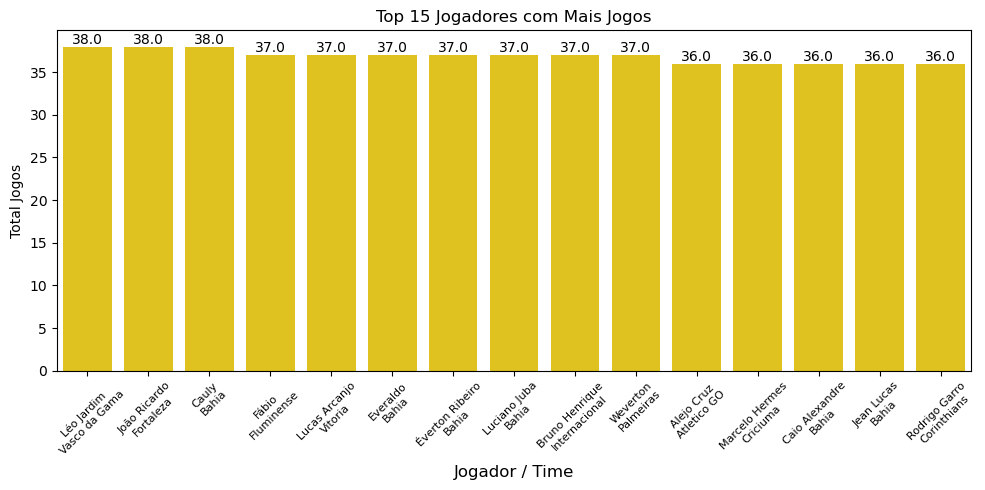

In [4]:
top_jogadores_jogos = df[["Jogador_Time", "Total Jogos"]].sort_values(by="Total Jogos", ascending=False).head(15)
fig, ax = plt.subplots(figsize=(10, 5))  
sns.barplot(data=top_jogadores_jogos, x="Jogador_Time", y="Total Jogos", ax=ax, color = "gold").set(title="Top 15 Jogadores com Mais Jogos")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45, fontsize=8)  
plt.tight_layout()
plt.show()


### 2. Quais foram os jogadores que receberam mais cartões (amarelos e vermelhos)?

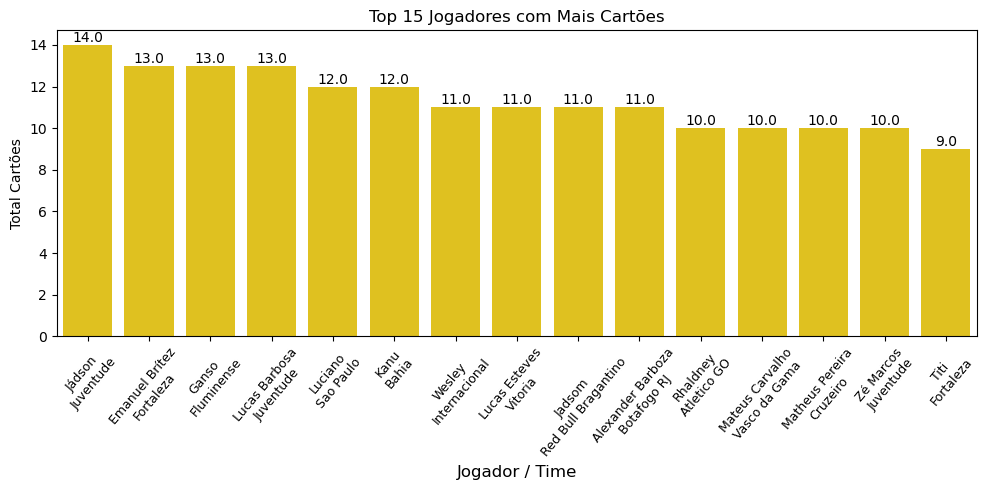

In [5]:
df["Total Cartões"] = df["Cartões Amarelo"] + df["Cartões Vermelho"]
top_cartoes = df[["Jogador_Time", "Total Cartões"]]
top_cartoes = top_cartoes.sort_values(by="Total Cartões", ascending=False).head(15)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_cartoes, x="Jogador_Time", y="Total Cartões", ax=ax, color = "gold").set(title="Top 15 Jogadores com Mais Cartões")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')
    
plt.xticks(rotation=50, fontsize=9)  
plt.tight_layout()
plt.show()

### 3. Quais foram os jogadores com mais participações em gols?

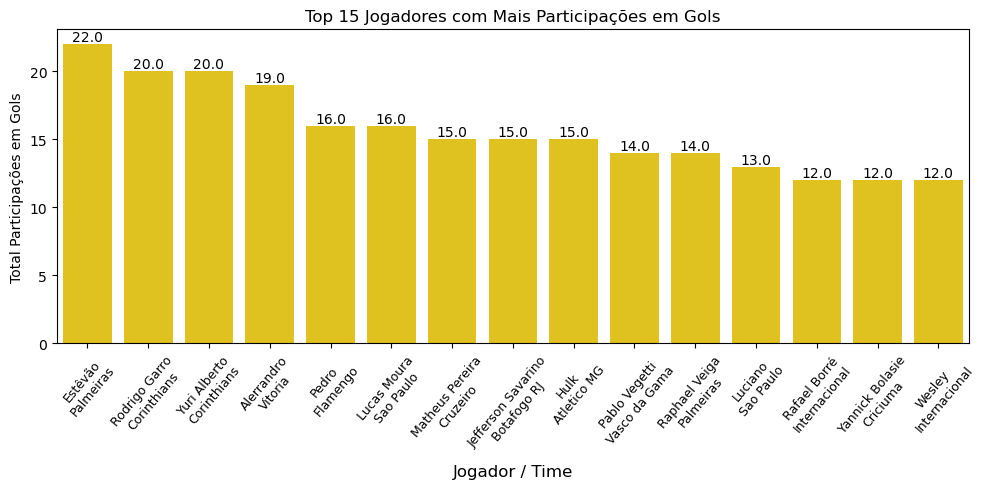

In [6]:
top_participacoes_gols = df[["Jogador_Time", "Total Participações em Gols"]].sort_values(by="Total Participações em Gols", ascending=False).head(15)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_participacoes_gols, x="Jogador_Time", y="Total Participações em Gols", ax=ax, color = "gold").set(title="Top 15 Jogadores com Mais Participações em Gols")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=50, fontsize=9)  
plt.tight_layout()
plt.show()

### 4. Quais jogadores tiveram a maior média de assistências por jogo?

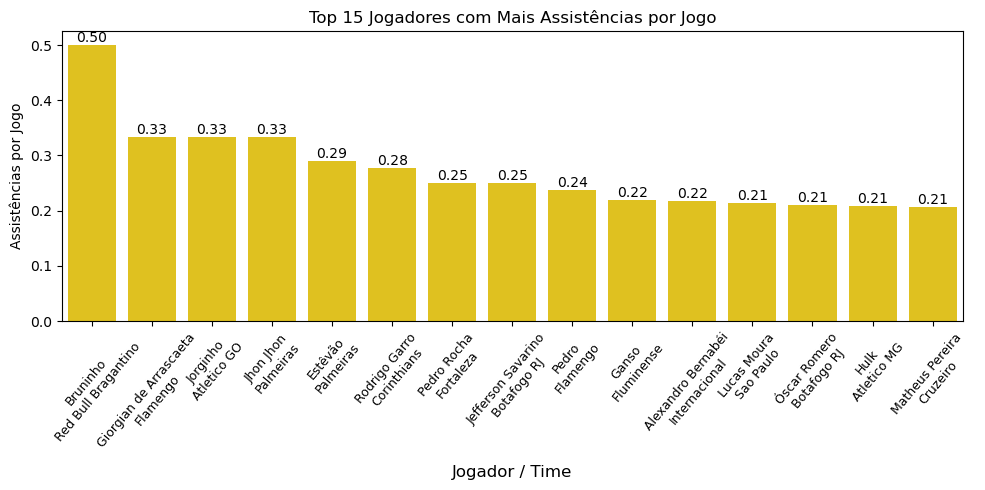

In [7]:
top_assistencias_por_jogo = df[["Jogador_Time", "Assistências por Jogo"]].sort_values(by="Assistências por Jogo", ascending=False).head(15)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_assistencias_por_jogo, x="Jogador_Time", y="Assistências por Jogo", ax=ax, color="gold").set(title="Top 15 Jogadores com Mais Assistências por Jogo")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks(rotation=50, fontsize=9)  
plt.tight_layout()
plt.show()


### 5. Qual foi a idade média dos jogadores por time?

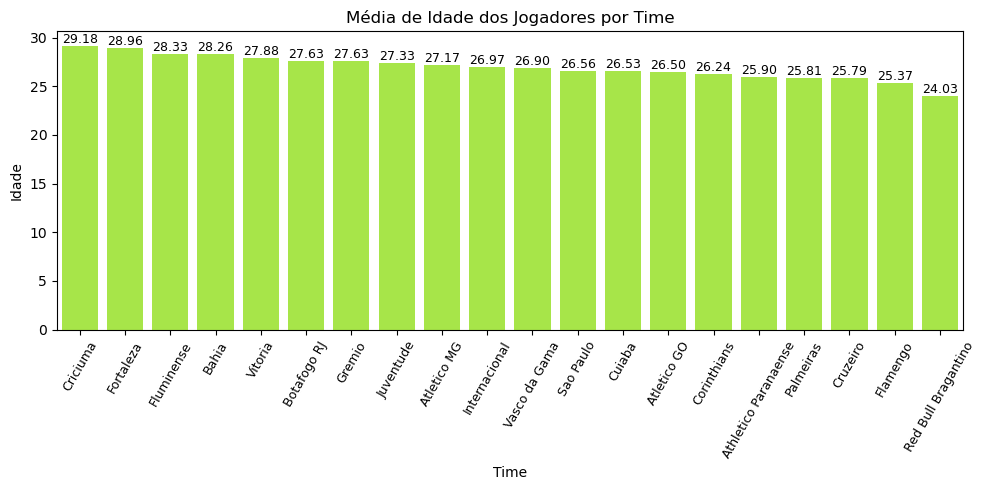

In [8]:
idade_media_time = df.groupby("Time")["Idade"].mean().reset_index()
idade_media_time = idade_media_time.sort_values(by="Idade", ascending=False)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=idade_media_time, x="Time", y="Idade", ax=ax, color = "greenyellow").set(title="Média de Idade dos Jogadores por Time")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')

plt.xticks(rotation=60, fontsize=9)  
plt.tight_layout()
plt.show()

### 6. Quais os jogadores com maiores notas por posição?

In [9]:
posicao = [
    "Goleiro",
    "Lateral Direito",
    "Zagueiro",
    "Defensor",
    "Lateral Esquerdo",
    "Volante",
    "Meio Campista",
    "Meia pela Direita",
    "Meia pela Esquerda",
    "Meia Atacante",
    "Ponta Direita",
    "Ponta Esquerda",
    "Atacante"  
]

def maiores_notas_por_posicao(df):
    resultados = []
    jogadores_ja_adicionados = set()
    
    for coluna in posicao:
        jogadores_posicao = df[df[coluna] == 'sim']
        
        jogadores_posicao = jogadores_posicao.sort_values(by='Nota', ascending=False)
        
        selecionado = False
        for index, jogador in jogadores_posicao.iterrows():
            if jogador['Jogador'] not in jogadores_ja_adicionados:
                jogadores_ja_adicionados.add(jogador['Jogador'])
                resultados.append([coluna, jogador['Jogador'], jogador['Time'], round(jogador['Nota'], 2)])
                selecionado = True
                break
        
    df_resultado = pd.DataFrame(resultados, columns=['Posição', 'Jogador', "Time", 'Nota'])
    return df_resultado

tabela_resultado = maiores_notas_por_posicao(df)
tabela_resultado

,Posição,Jogador,Time,Nota
0,Goleiro,Bento,Athletico Paranaense,7.05
1,Lateral Direito,Braian Aguirre,Internacional,7.45
2,Zagueiro,Alexandro Bernabéi,Internacional,7.34
3,Defensor,Lyncon,Vasco da Gama,7.20
4,Lateral Esquerdo,William,Cruzeiro,7.08
5,Volante,Gregore,Botafogo RJ,7.03
6,Meio Campista,Alan Patrick,Internacional,7.31
7,Meia pela Direita,Raphael Veiga,Palmeiras,7.06
8,Meia pela Esquerda,Nicolás de la Cruz,Flamengo,7.05
9,Meia Atacante,Estêvão,Palmeiras,7.38


### 7. Quais jogadores com melhor acertividade nos chutes?

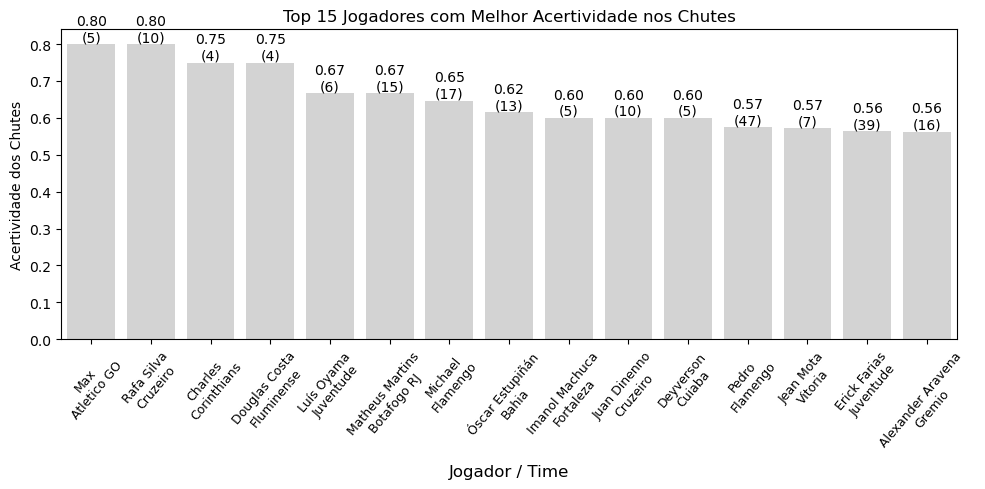

In [10]:
# Filtrar pelos jogadores que deram mais do que 3 chutes
df_chutes = df[df["Total de Chutes"] > 3]
top_precisao_chutes = df_chutes[["Jogador_Time", "Total de Chutes", "Acertividade dos Chutes"]].sort_values(by="Acertividade dos Chutes", ascending=False).head(15)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_precisao_chutes, x="Jogador_Time", y="Acertividade dos Chutes", ax=ax, color = "lightgrey").set(title="Top 15 Jogadores com Melhor Acertividade nos Chutes")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    acertividade = f"{p.get_height():.2f}"
    jogador = top_precisao_chutes.iloc[int(p.get_x() + p.get_width() / 2)]['Jogador_Time']
    total_chutes = top_precisao_chutes[top_precisao_chutes['Jogador_Time'] == jogador]['Total de Chutes'].values[0]
    
    ax.annotate(f"{acertividade}\n({total_chutes})",  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks(rotation=50, fontsize=9)  
plt.tight_layout()
plt.show()


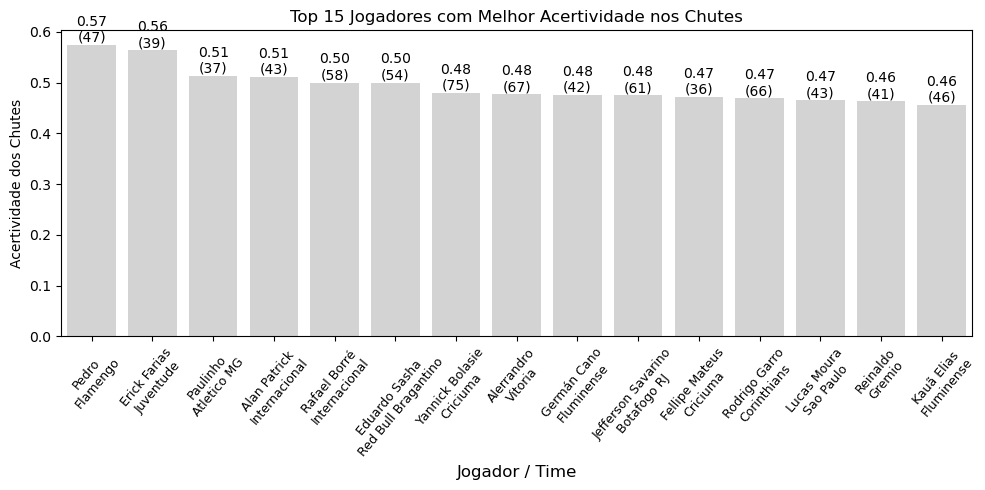

In [11]:
# Maiores Acertividades de Chutes dentre os jogadores que mais chutaram 
df_chutes = df[df["Total de Chutes"] > 30]
top_precisao_chutes = df_chutes[["Jogador_Time", "Total de Chutes", "Acertividade dos Chutes"]].sort_values(by="Acertividade dos Chutes", ascending=False).head(15)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_precisao_chutes, x="Jogador_Time", y="Acertividade dos Chutes", ax=ax, color = "lightgrey").set(title="Top 15 Jogadores com Melhor Acertividade nos Chutes")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    acertividade = f"{p.get_height():.2f}"
    jogador = top_precisao_chutes.iloc[int(p.get_x() + p.get_width() / 2)]['Jogador_Time']
    total_chutes = top_precisao_chutes[top_precisao_chutes['Jogador_Time'] == jogador]['Total de Chutes'].values[0]
    
    ax.annotate(f"{acertividade}\n({total_chutes})",  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks(rotation=50, fontsize=9)  
plt.tight_layout()
plt.show()

### 8. Quais zagueiros com mais participações em gols?

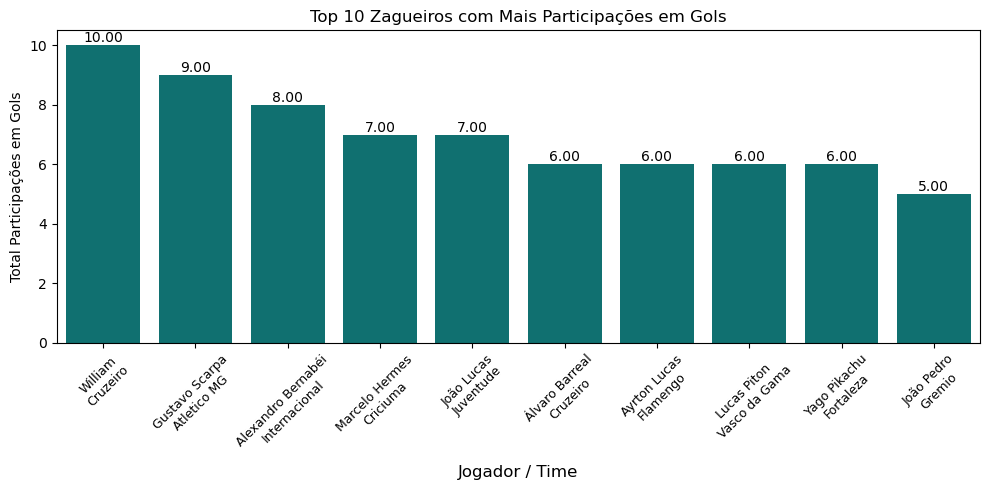

In [12]:
zagueiros = df[df["Zagueiro"] == "sim"]
top_zagueiros_participacao = zagueiros[["Jogador_Time", "Total Participações em Gols"]].sort_values(by="Total Participações em Gols", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_zagueiros_participacao, x="Jogador_Time", y="Total Participações em Gols", ax=ax, color = "teal").set(title="Top 10 Zagueiros com Mais Participações em Gols")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks(rotation=45, fontsize=9)  
plt.tight_layout()
plt.show()

Em algum momento o jogador Gustavo Scarpa deve ter feito a função de zagueiro, e por isso com considerado também como zagueiro pela base de dados do site.

### 9. Quais zagueiros com maior taxa de duelos aéreos ganhos?

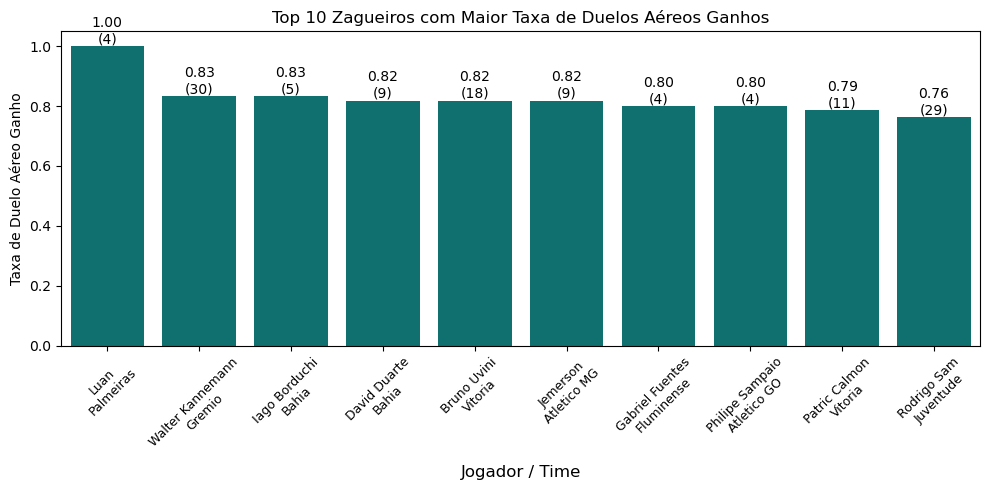

In [13]:
# Filtrar pelos jogadores que ganharam mais do que 3 Duelos Aéreos
zagueiros = df[(df["Zagueiro"] == "sim") & (df["Duelos Aéreos Ganhos"] > 3)]
top_zagueiros_duelos = zagueiros[["Jogador_Time", "Duelos Aéreos Ganhos", "Taxa de Duelo Aéreo Ganho"]].sort_values(by="Taxa de Duelo Aéreo Ganho", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_zagueiros_duelos, x="Jogador_Time", y="Taxa de Duelo Aéreo Ganho", ax=ax, color = "teal").set(title="Top 10 Zagueiros com Maior Taxa de Duelos Aéreos Ganhos")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    acertividade = f"{p.get_height():.2f}"
    jogador = top_zagueiros_duelos.iloc[int(p.get_x() + p.get_width() / 2)]['Jogador_Time']
    duelos_ganhos = top_zagueiros_duelos[top_zagueiros_duelos['Jogador_Time'] == jogador]['Duelos Aéreos Ganhos'].values[0]
    
    ax.annotate(f"{acertividade}\n({duelos_ganhos})",  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks(rotation=45, fontsize=9)  
plt.tight_layout()
plt.show()

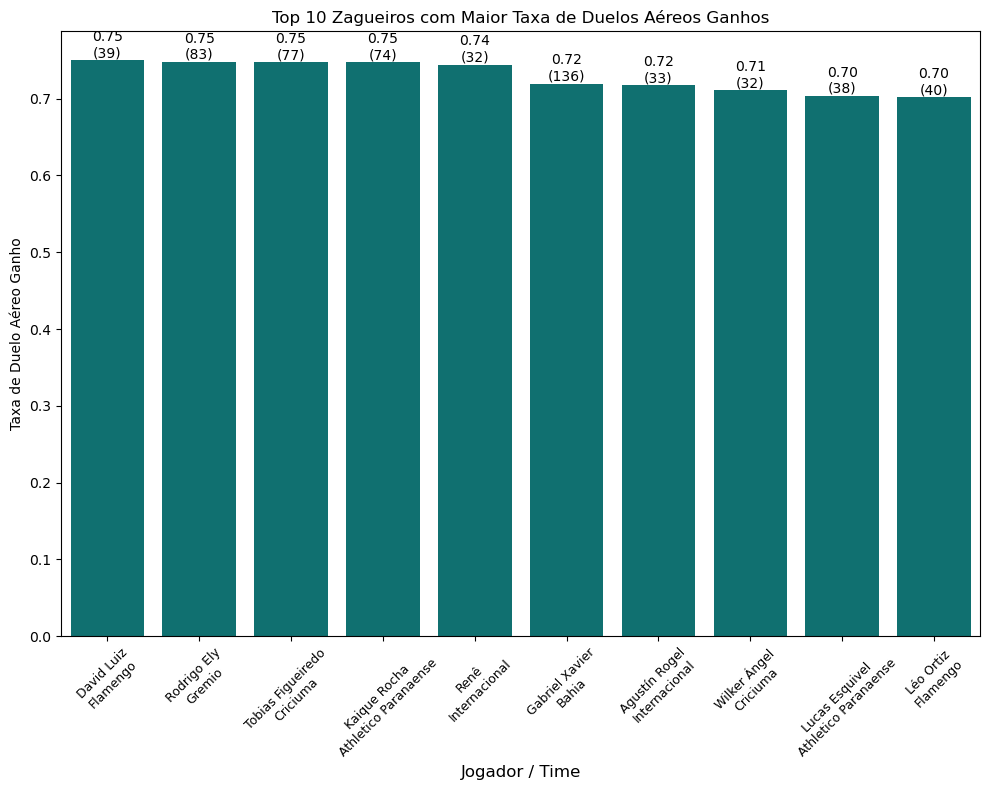

In [14]:
# Maiores Taxas de Duelos Aéreos dentre os jogadores que mais Ganharam Duelos Aérios
zagueiros = df[(df["Zagueiro"] == "sim") & (df["Duelos Aéreos Ganhos"] > 30)]
top_zagueiros_duelos = zagueiros[["Jogador_Time", "Duelos Aéreos Ganhos", "Taxa de Duelo Aéreo Ganho"]].sort_values(by="Taxa de Duelo Aéreo Ganho", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=top_zagueiros_duelos, x="Jogador_Time", y="Taxa de Duelo Aéreo Ganho", ax=ax, color = "teal").set(title="Top 10 Zagueiros com Maior Taxa de Duelos Aéreos Ganhos")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    acertividade = f"{p.get_height():.2f}"
    jogador = top_zagueiros_duelos.iloc[int(p.get_x() + p.get_width() / 2)]['Jogador_Time']
    duelos_ganhos = top_zagueiros_duelos[top_zagueiros_duelos['Jogador_Time'] == jogador]['Duelos Aéreos Ganhos'].values[0]
    
    ax.annotate(f"{acertividade}\n({duelos_ganhos})",  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks(rotation=45, fontsize=9)  
plt.tight_layout()
plt.show()

### 10. Quais atacantes com maior taxa de duelos aéreos ganhos?

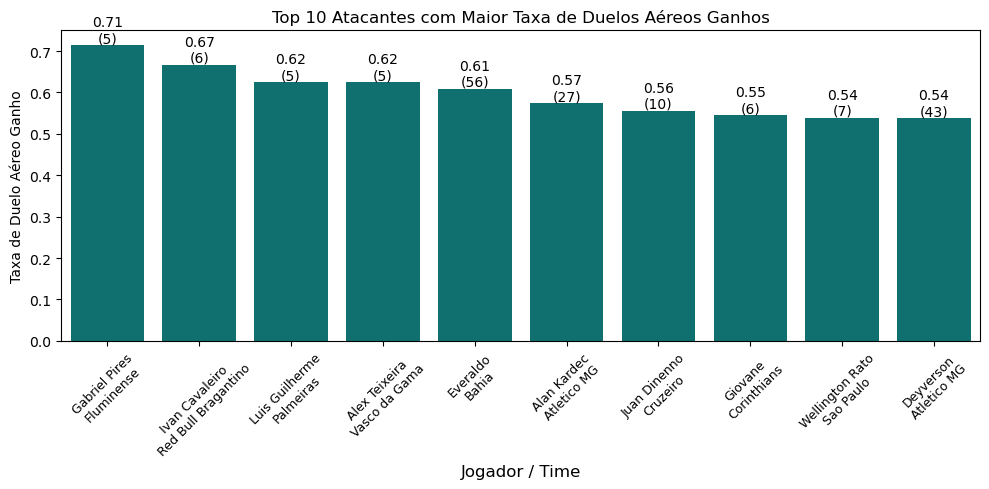

In [15]:
# Filtrar pelos jogadores que ganharam mais do que 3 Duelos Aéreos
atacantes = df[(df["Atacante"] == "sim") & (df["Duelos Aéreos Ganhos"] > 3)]
top_atacantes_duelos = atacantes[["Jogador_Time", "Duelos Aéreos Ganhos", "Taxa de Duelo Aéreo Ganho"]].sort_values(by="Taxa de Duelo Aéreo Ganho", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_atacantes_duelos, x="Jogador_Time", y="Taxa de Duelo Aéreo Ganho", ax=ax, color = "teal").set(title="Top 10 Atacantes com Maior Taxa de Duelos Aéreos Ganhos")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    acertividade = f"{p.get_height():.2f}"
    jogador = top_atacantes_duelos.iloc[int(p.get_x() + p.get_width() / 2)]['Jogador_Time']
    duelos_ganhos = top_atacantes_duelos[top_atacantes_duelos['Jogador_Time'] == jogador]['Duelos Aéreos Ganhos'].values[0]
    
    ax.annotate(f"{acertividade}\n({duelos_ganhos})",  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks(rotation=45, fontsize=9)  
plt.tight_layout()
plt.show()

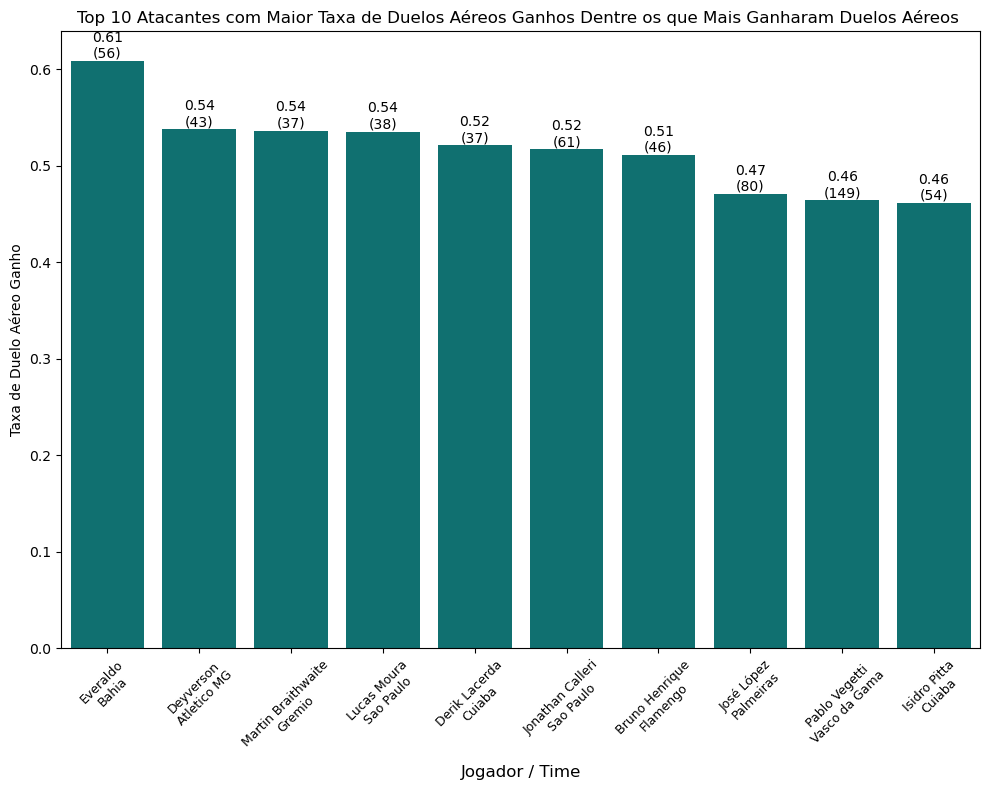

In [16]:
# Maiores Taxas de Duelos Aéreos dentre os jogadores que mais Ganharam Duelos Aérios
atacantes = df[(df["Atacante"] == "sim") & (df["Duelos Aéreos Ganhos"] > 30)]
top_atacantes_duelos = atacantes[["Jogador_Time", "Duelos Aéreos Ganhos", "Taxa de Duelo Aéreo Ganho"]].sort_values(by="Taxa de Duelo Aéreo Ganho", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=top_atacantes_duelos, x="Jogador_Time", y="Taxa de Duelo Aéreo Ganho", ax=ax, color = "teal").set(title="Top 10 Atacantes com Maior Taxa de Duelos Aéreos Ganhos Dentre os que Mais Ganharam Duelos Aéreos ")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    acertividade = f"{p.get_height():.2f}"
    jogador = top_atacantes_duelos.iloc[int(p.get_x() + p.get_width() / 2)]['Jogador_Time']
    duelos_ganhos = top_atacantes_duelos[top_atacantes_duelos['Jogador_Time'] == jogador]['Duelos Aéreos Ganhos'].values[0]
    
    ax.annotate(f"{acertividade}\n({duelos_ganhos})",  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks(rotation=45, fontsize=9)  
plt.tight_layout()
plt.show()

### 11. Quais meias atacantes com mais passes decisivos por jogo?

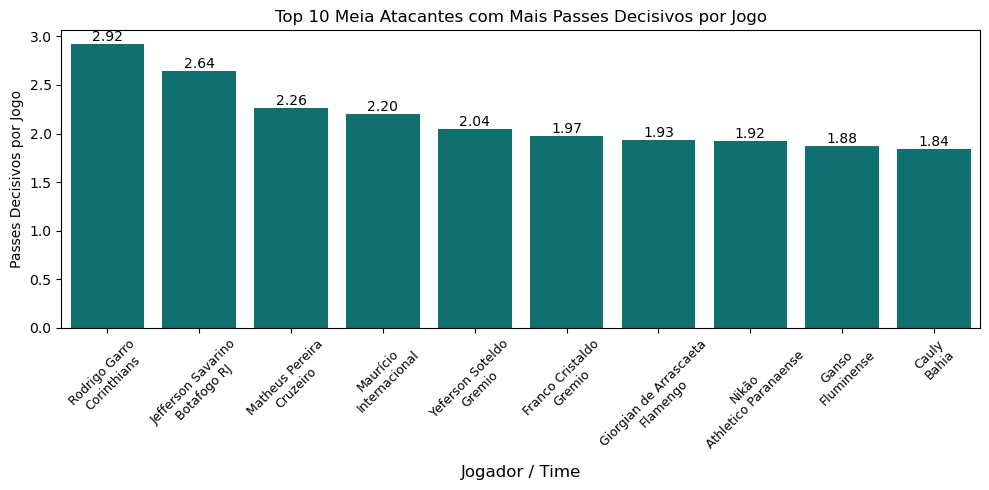

In [17]:
meias = df[df["Meia Atacante"] == "sim"]
top_meias_passes = meias[["Jogador_Time", "Passes Decisivos por Jogo"]].sort_values(by="Passes Decisivos por Jogo", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_meias_passes, x="Jogador_Time", y="Passes Decisivos por Jogo", ax=ax, color = "teal").set(title="Top 10 Meia Atacantes com Mais Passes Decisivos por Jogo")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks(rotation=45, fontsize=9)  
plt.tight_layout()
plt.show()

### 12. Quais pontas com mais dribles por jogo?

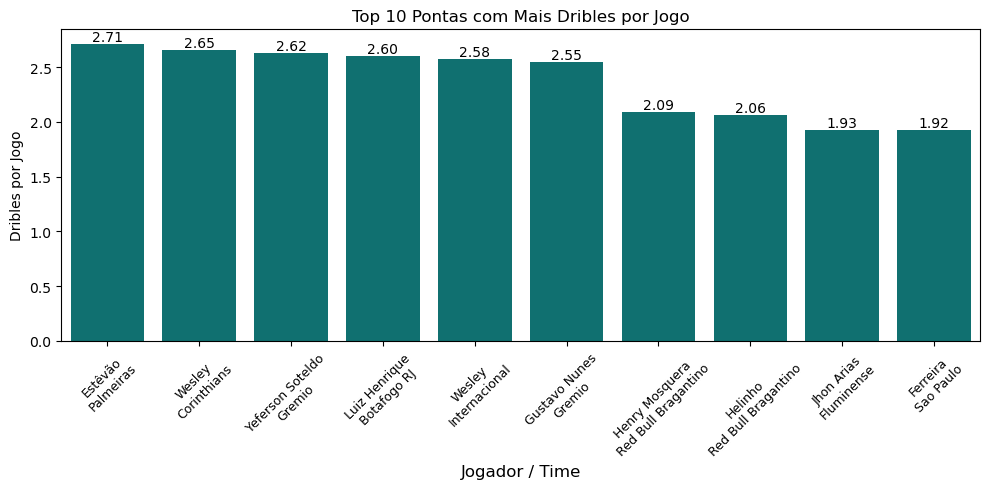

In [18]:
pontas = df[(df["Ponta Direita"] == "sim") | (df["Ponta Esquerda"] == "sim")]
top_pontas_dribles = pontas[["Jogador_Time", "Dribles por Jogo"]].sort_values(by="Dribles por Jogo", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_pontas_dribles, x="Jogador_Time", y="Dribles por Jogo", ax=ax, color = "teal").set(title="Top 10 Pontas com Mais Dribles por Jogo")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks(rotation=45, fontsize=9)  
plt.tight_layout()
plt.show()

### 13. Quais laterais com melhor acertividade nos cruzamentos?

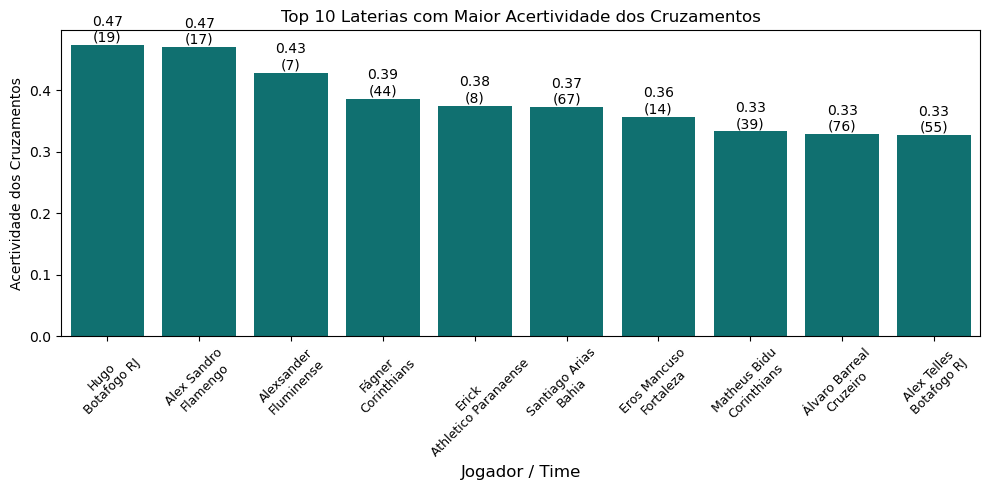

In [19]:
# Filtrar pelos jogadores que deram mais do que 3 Cruzamentos
laterais = df[((df["Lateral Direito"] == "sim") | (df["Lateral Esquerdo"] == "sim")) & (df["Total de Cruzamentos"] > 3)]
top_laterais_cruzamentos = laterais[["Jogador_Time", "Total de Cruzamentos", "Acertividade dos Cruzamentos"]].sort_values(by="Acertividade dos Cruzamentos", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_laterais_cruzamentos, x="Jogador_Time", y="Acertividade dos Cruzamentos", ax=ax, color = "teal").set(title="Top 10 Laterias com Maior Acertividade dos Cruzamentos")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    acertividade = f"{p.get_height():.2f}"
    jogador = top_laterais_cruzamentos.iloc[int(p.get_x() + p.get_width() / 2)]['Jogador_Time']
    cruzamentos_certos = top_laterais_cruzamentos[top_laterais_cruzamentos['Jogador_Time'] == jogador]['Total de Cruzamentos'].values[0]
    
    ax.annotate(f"{acertividade}\n({cruzamentos_certos})",  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks(rotation=45, fontsize=9)  
plt.tight_layout()
plt.show()

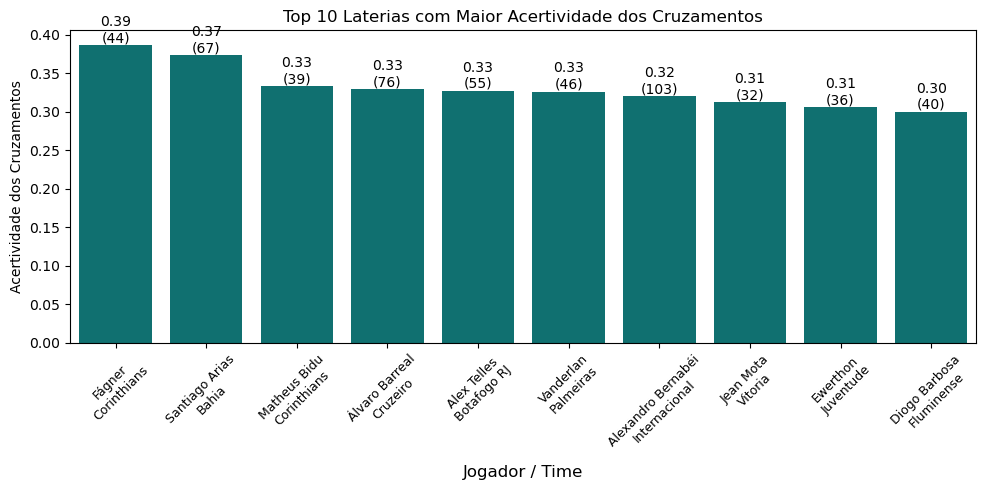

In [20]:
# Maiores Acertividade dos Cruzamentos dentre os jogadores que mais Cruzaram
laterais = df[((df["Lateral Direito"] == "sim") | (df["Lateral Esquerdo"] == "sim")) & (df["Total de Cruzamentos"] > 30)]
top_laterais_cruzamentos = laterais[["Jogador_Time", "Total de Cruzamentos", "Acertividade dos Cruzamentos"]].sort_values(by="Acertividade dos Cruzamentos", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_laterais_cruzamentos, x="Jogador_Time", y="Acertividade dos Cruzamentos", ax=ax, color = "teal").set(title="Top 10 Laterias com Maior Acertividade dos Cruzamentos")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    acertividade = f"{p.get_height():.2f}"
    jogador = top_laterais_cruzamentos.iloc[int(p.get_x() + p.get_width() / 2)]['Jogador_Time']
    cruzamentos_certos = top_laterais_cruzamentos[top_laterais_cruzamentos['Jogador_Time'] == jogador]['Total de Cruzamentos'].values[0]
    
    ax.annotate(f"{acertividade}\n({cruzamentos_certos})",  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks(rotation=45, fontsize=9)  
plt.tight_layout()
plt.show()

### 14. Quais volantes com menos dribles sofridos por jogo?

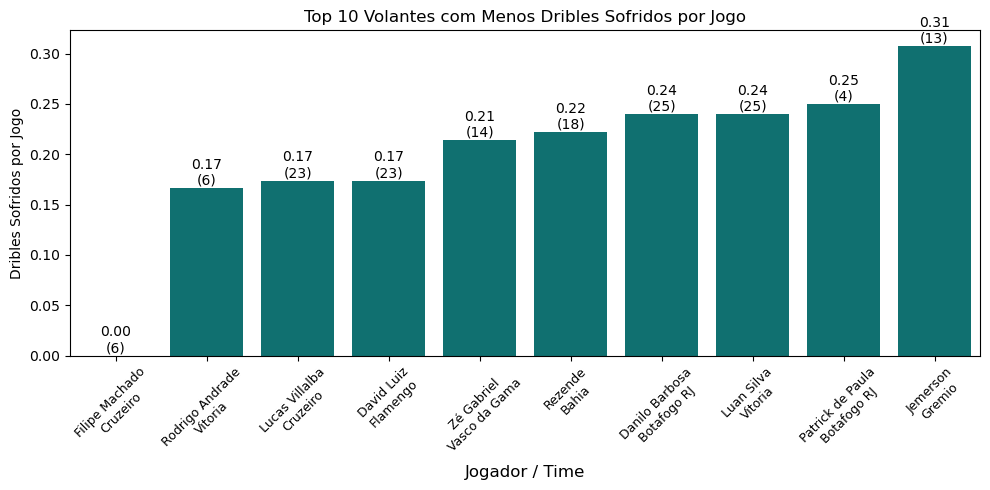

In [21]:
# Filtrar pelos jogadores que jogaram mais do que 3 jogos
volantes = df[(df["Volante"] == "sim") & (df["Total Jogos"] > 3)]
top_volantes_dribles = volantes[["Jogador_Time", "Total Jogos", "Dribles Sofridos por Jogo"]].sort_values(by="Dribles Sofridos por Jogo").head(10)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_volantes_dribles, x="Jogador_Time", y="Dribles Sofridos por Jogo", ax=ax, color = "teal").set(title="Top 10 Volantes com Menos Dribles Sofridos por Jogo")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    acertividade = f"{p.get_height():.2f}"
    jogador = top_volantes_dribles.iloc[int(p.get_x() + p.get_width() / 2)]['Jogador_Time']
    dribles_sofridos = top_volantes_dribles[top_volantes_dribles['Jogador_Time'] == jogador]['Total Jogos'].values[0]
    
    ax.annotate(f"{acertividade}\n({dribles_sofridos})",  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks(rotation=45, fontsize=9)  
plt.tight_layout()
plt.show()

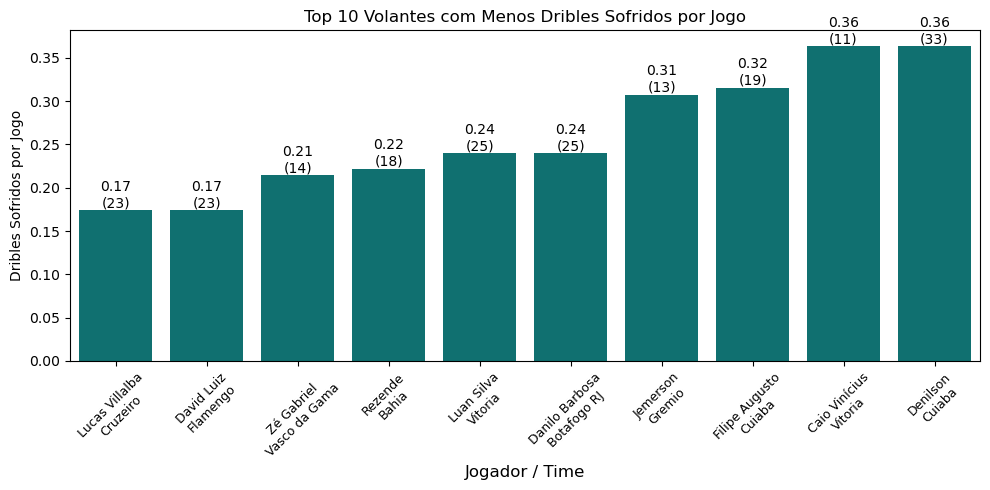

In [22]:
# Filtrar pelos jogadores que jogaram mais do que 10 jogos
volantes = df[(df["Volante"] == "sim") & (df["Total Jogos"] > 10)]
top_volantes_dribles = volantes[["Jogador_Time", "Total Jogos", "Dribles Sofridos por Jogo"]].sort_values(by="Dribles Sofridos por Jogo").head(10)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_volantes_dribles, x="Jogador_Time", y="Dribles Sofridos por Jogo", ax=ax, color = "teal").set(title="Top 10 Volantes com Menos Dribles Sofridos por Jogo")
ax.set_xlabel("Jogador / Time", fontsize=12)

for p in ax.patches:
    acertividade = f"{p.get_height():.2f}"
    jogador = top_volantes_dribles.iloc[int(p.get_x() + p.get_width() / 2)]['Jogador_Time']
    dribles_sofridos = top_volantes_dribles[top_volantes_dribles['Jogador_Time'] == jogador]['Total Jogos'].values[0]
    
    ax.annotate(f"{acertividade}\n({dribles_sofridos})",  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks(rotation=45, fontsize=9)  
plt.tight_layout()
plt.show()

### 15. Existe correlação entre idade e dribles sofridos por jogo?

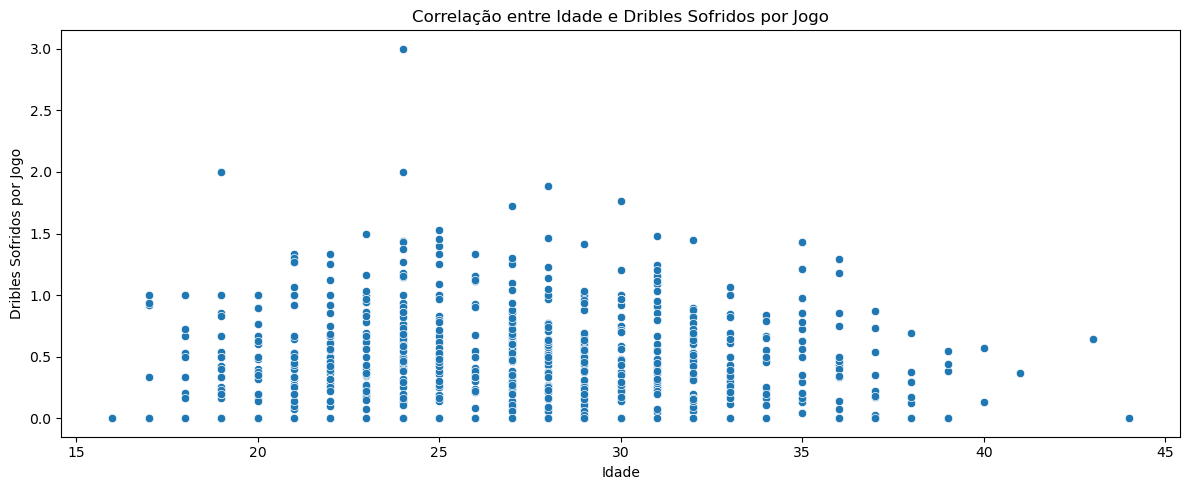

In [23]:
correlacao_idade_dribles_sofridos = df[["Idade", "Dribles Sofridos por Jogo"]].corr().iloc[0, 1]
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(data=df, x="Idade", y="Dribles Sofridos por Jogo", ax=ax).set(title="Correlação entre Idade e Dribles Sofridos por Jogo")
plt.tight_layout()
plt.show()

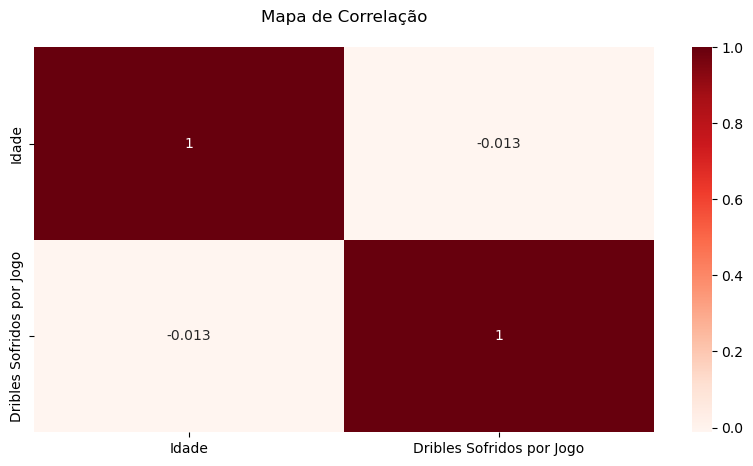

In [24]:
correlacao_idade_dribles_sofridos2 = df[["Idade", "Dribles Sofridos por Jogo"]].corr()
plt.figure(figsize = (10,5))
sns.heatmap(correlacao_idade_dribles_sofridos2, annot = True, cmap = "Reds")
plt.title("Mapa de Correlação\n", fontdict = {'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

>A análise indica que não há uma correlação significativa entre a idade e a quantidade de dribles sofridos por jogo. Ou seja, jogadores mais velhos ou mais novos tendem a sofrer dribles em uma frequência semelhante.

### 16. Existe correlação entre idade e número de participação em gols?

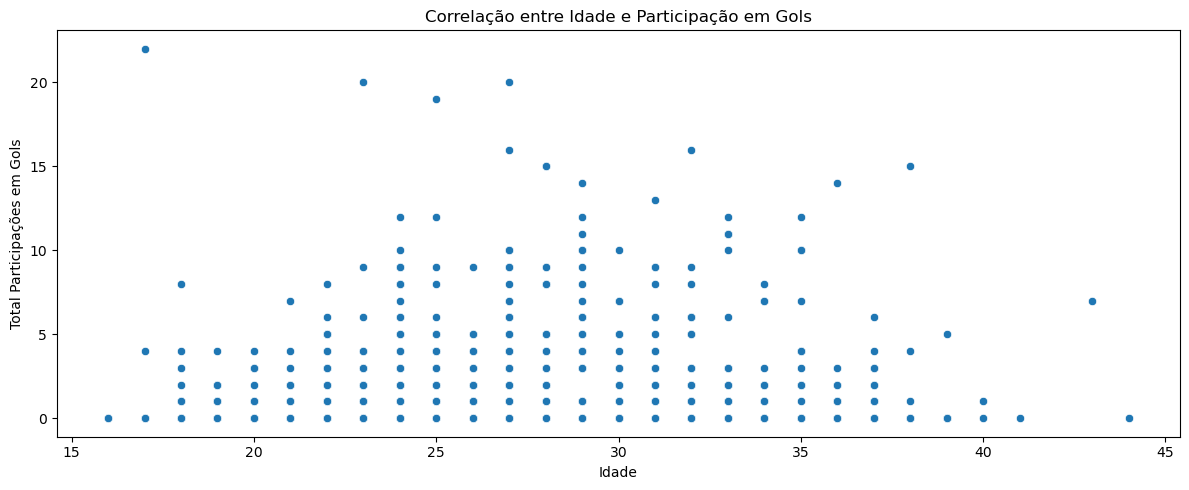

In [25]:
correlacao_idade_gols = df[["Idade", "Total Participações em Gols"]].corr().iloc[0, 1]
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(data=df, x="Idade", y="Total Participações em Gols", ax=ax).set(title="Correlação entre Idade e Participação em Gols")
plt.tight_layout()
plt.show()

### 17. Existe correlação entre idade e nota?

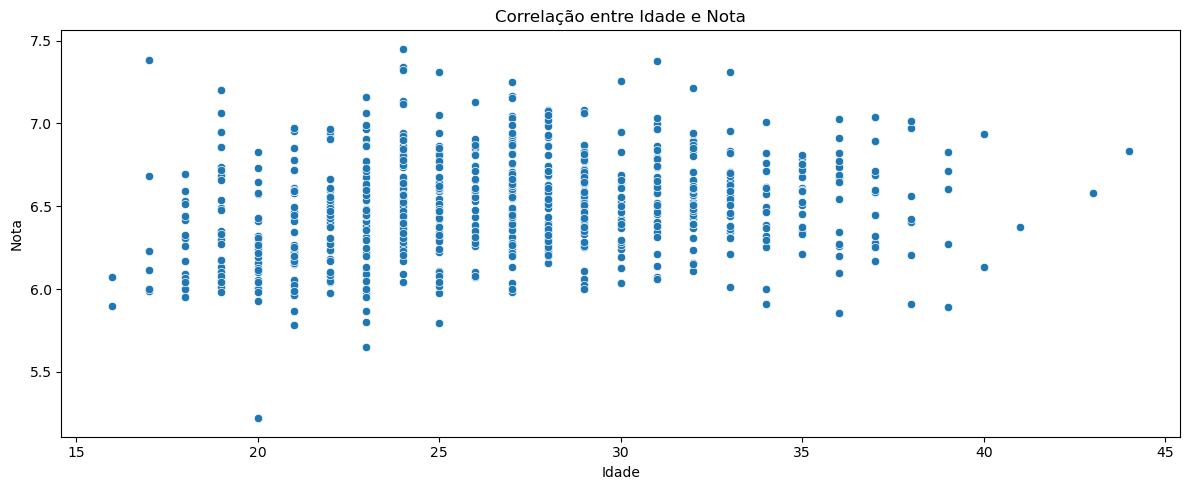

In [26]:
correlacao_idade_nota = df[["Idade", "Nota"]].corr().iloc[0, 1]
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(data=df, x="Idade", y="Nota", ax=ax).set(title="Correlação entre Idade e Nota")
plt.tight_layout()
plt.show()

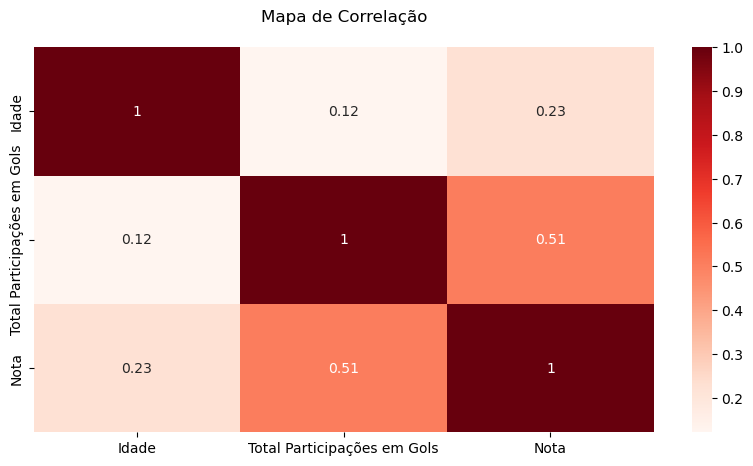

In [27]:
correlacao_idade_gols_nota = df[["Idade", "Total Participações em Gols", "Nota"]].corr()
plt.figure(figsize = (10,5))
sns.heatmap(correlacao_idade_gols_nota, annot = True, cmap = "Reds")
plt.title("Mapa de Correlação\n", fontdict = {'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

#### Idade e Total de Participações em Gols (0.12)

- Correlação fraca e positiva. Isso indica que a idade tem pouca influência no número de participações em gols. Jogadores mais velhos ou mais novos contribuem para gols de forma relativamente similar.

#### Idade e Nota (0.23)

- Correlação fraca, mas um pouco maior que a anterior. Sugere que jogadores mais velhos tendem a ter notas um pouco melhores, mas a relação ainda é fraca.

#### Total de Participações em Gols e Nota (0.51)

- Correlação moderada e positiva. Isso significa que quanto mais um jogador participa de gols, maior tende a ser sua nota. Essa é a relação mais forte do gráfico, o que faz sentido, já que participações em gols são fatores importantes para avaliar o desempenho.